### Preprocessing (31 pts) ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('GermanCredit.csv')

1. [8 pts] Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)

In [2]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: x if str(x).lower() != 'none' else np.nan )
ss = []
for i, col in enumerate(df.columns):
    ss.append([col, i, df[col].count()])
ss.sort(key = lambda x: (x[-1], x[1]))
n = 3
df = df.drop([x[0] for x in ss[:3]], axis=1)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad


2. [4 pts] Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.


In [3]:
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].str.replace("'", '')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad


3. [5 pts] The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.

In [4]:
df['checking_status'] = df['checking_status'].str.replace('no checking', 'No Checking')
df['checking_status'] = df['checking_status'].str.replace('<0', 'Low')
df['checking_status'] = df['checking_status'].str.replace('0<=X<200', 'Medium')
df['checking_status'] = df['checking_status'].str.replace('>=200', 'High')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad


4. [5 pts] The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').

In [5]:
df['savings_status'] = df['savings_status'].str.replace('no known savings', 'No Savings')
df['savings_status'] = df['savings_status'].str.replace('<100', 'Low')
df['savings_status'] = df['savings_status'].str.replace('100<=X<500', 'Medium')
df['savings_status'] = df['savings_status'].str.replace('500<=X<1000', 'High')
df['savings_status'] = df['savings_status'].str.replace('>=1000', 'High')
df['savings_status']

0      No Savings
1             Low
2             Low
3             Low
4             Low
          ...    
995           Low
996           Low
997           Low
998           Low
999        Medium
Name: savings_status, Length: 1000, dtype: object

5. [4 pts] Change class column values from 'good' to '1' and 'bad' to '0'

In [6]:
df['class'] = df['class'].replace('good', 1)
df['class'] = df['class'].replace('bad', 0)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,0


6. [5 pts] Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.

In [7]:
df['employment'] = df['employment'].str.replace('unemployed', 'Unemployed')
df['employment'] = df['employment'].str.replace('<1', 'Amateur')
df['employment'] = df['employment'].str.replace('1<=X<4',  'Professional')
df['employment'] = df['employment'].str.replace('4<=X<7', 'Experienced')
df['employment'] = df['employment'].str.replace('>=7', 'Expert')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0


### Analysis (17 pts) ###

1. [5 pts] Often we need to find correlations between categorical attributes, i.e. attributes that have values that fall in one of several categories, such as "yes"/"no" for attr1, or "low","medium","high" for attr2.
One such correlation is to find counts in combinations of categorial values across attributes, as in how many instances are "yes" for attr1 and "low" for attr2. A good way to find such counts is to use the Pandas crosstab (Links to an external site.) function. Do this for the following two counts.

a. [3 pts] Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).

b. [2 pts] Similarly, get the count of each category of employment for each category of saving_status.

In [8]:
df[df['class']==1]['foreign_worker'].value_counts()

yes    667
no      33
Name: foreign_worker, dtype: int64

In [9]:
print('Good credit with foreign worker attribute to be yes {} and no {}.'.format(*df[df['class']==1]['foreign_worker'].value_counts()))
print('Bad credit with foreign worker attribute to be yes {} and no {}.'.format(*df[df['class']==0]['foreign_worker'].value_counts()))

Good credit with foreign worker attribute to be yes 667 and no 33.
Bad credit with foreign worker attribute to be yes 296 and no 4.


In [10]:
for emp in df['employment'].unique():
    print('Employment in {}:'.format(emp), '\n', df[df['employment']==emp]['savings_status'].value_counts())
    print('-'*64)

Employment in Expert: 
 Low           133
No Savings     64
Medium         22
500<=XLow0     20
High           14
Name: savings_status, dtype: int64
----------------------------------------------------------------
Employment in Professional: 
 Low           210
No Savings     52
Medium         33
500<=XLow0     26
High           18
Name: savings_status, dtype: int64
----------------------------------------------------------------
Employment in Experienced: 
 Low           100
No Savings     32
Medium         24
High            9
500<=XLow0      9
Name: savings_status, dtype: int64
----------------------------------------------------------------
Employment in Unemployed: 
 Low           40
No Savings    12
Medium         7
500<=XLow0     3
Name: savings_status, dtype: int64
----------------------------------------------------------------
Employment in Amateur: 
 Low           120
No Savings     23
Medium         17
High            7
500<=XLow0      5
Name: savings_status, dtype: int64
-

2. [4 pts] Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.

In [11]:
df[(df['employment'] == 'Experienced')&(df['personal_status']=='male single')]['credit_amount'].mean()

4142.592592592592

3. [4 pts] Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.

In [12]:
df.groupby('job')['duration'].mean()

job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident           16.535000
Name: duration, dtype: float64

4. [4 pts] For the purpose 'education', what is the most common checking_status and savings_status? 

In [13]:
com_check = df[df['purpose'] == 'education'][('checking_status')].value_counts()
com_sav = df[df['purpose'] == 'education'][('savings_status')].value_counts()
print(com_check)
print(com_sav)
print('-'*64)
print('Most common checking status: {}({}).'.format(com_check.index[0], com_check[0]))
print('Most common checking status: {}({}).'.format(com_sav.index[0], com_sav[0]))

No Checking    20
Low            13
Medium         13
High            4
Name: checking_status, dtype: int64
Low           30
No Savings    11
Medium         5
High           2
500<=XLow0     2
Name: savings_status, dtype: int64
----------------------------------------------------------------
Most common checking status: No Checking(20).
Most common checking status: Low(30).


### Visualization (24 pts) ###

1. [9 pts] Plot subplots of two histograms: one with savings_status on the x-axis and personal_status as different colors, and another with checking_status on the x-axis and personal_status as different colors.

(array([274.,   0.,   0., 269.,   0.,   0., 394.,   0.,   0.,  63.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

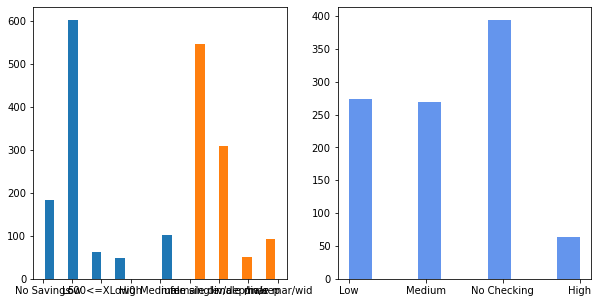

In [21]:
color_dict = {}
color = ['red', 'orange', 'blue', 'salmon']
for pst, col in zip(df['personal_status'].unique(), color):
    color_dict[pst]  = col
df['color'] = df['personal_status'].apply(lambda x: color_dict[x])
plt.figure(figsize=(10, 5))
ax = plt.subplot(121)
ax.hist([df['savings_status'], df['personal_status']],bins={})
ax = plt.subplot(122)
ax.hist(df['checking_status'], color='cornflowerblue')

2. [9 pts] For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).

<BarContainer object of 4 artists>

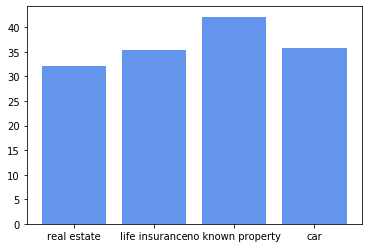

In [112]:
dfn = df[df['credit_amount']>4000]
age_mean = dfn.groupby('property_magnitude')['age'].mean()
plt.bar(dfn['property_magnitude'].unique(), age_mean, color='cornflowerblue')

3. [6 pts] For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:
1)Personal status 
2)Credit history
3)Job


In [44]:
dfn = df[(df['age']>40)&(df['savings_status']=='High')]
plt.figure(figsize=(15,5))
ax = plt.subplot(131)
pst = dfn.groupby('personal_status')['personal_status'].count()
ax.pie(pst, labels=pst.index)
ax.set_title('personal status'.title())
ax = plt.subplot(132)
pst = dfn.groupby('credit_history')['credit_history'].count()
ax.pie(pst, labels=pst.index, labeldistance=0.8, startangle=-30)
ax.set_title('credit history'.title())
ax = plt.subplot(133)
pst = dfn.groupby('job')['job'].count()
ax.pie(pst, labels=pst.index)
ax.set_title('job'.title())

KeyError: 'savings_status'